# import the libraries

In [19]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from utils import *

sns.set_style("darkgrid")

# read the data

In [20]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# EDA

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               553952 non-null  int64  
 1   Date               553952 non-null  object 
 2   Locality           553952 non-null  object 
 3   Address            553952 non-null  object 
 4   Estimated Value    553952 non-null  float64
 5   Sale Price         553952 non-null  float64
 6   Property           553952 non-null  object 
 7   Residential        553952 non-null  object 
 8   num_rooms          553952 non-null  int64  
 9   carpet_area        553952 non-null  int64  
 10  property_tax_rate  553952 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 46.5+ MB


In [22]:
train.head()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
0,2009,2009-01-02,Greenwich,40 ETTL LN UT 24,711270.0,975000.0,Condo,Condominium,2,760,1.025953
1,2009,2009-01-02,East Hampton,18 BAUER RD,119970.0,189900.0,Single Family,Detached House,3,921,1.025953
2,2009,2009-01-02,Ridgefield,48 HIGH VALLEY RD.,494530.0,825000.0,Single Family,Detached House,3,982,1.025953
3,2009,2009-01-02,Old Lyme,56 MERIDEN RD,197600.0,450000.0,Single Family,Detached House,3,976,1.025953
4,2009,2009-01-02,Naugatuck,13 CELENTANO DR,105440.0,200000.0,Single Family,Detached House,3,947,1.025953


In [23]:
train.tail()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
553947,2022,2022-12-31,Enfield,50 SWORD AVE,122420.0,198000.0,Residential,Detached House,3,1009,1.003979
553948,2022,2022-12-31,Naugatuck,10 ROLLINGWOOD DR,139180.0,319900.0,Residential,Detached House,3,999,1.003979
553949,2022,2022-12-31,South Windsor,189 PALMER DR,200000.0,305000.0,Residential,Detached House,3,1017,1.003979
553950,2022,2022-12-31,Bloomfield,33 BURNWOOD DRIVE,195440.0,271000.0,Residential,Detached House,3,1061,1.003979
553951,2022,2022-12-31,Stamford,154 GAYMOOR DRIVE,346600.0,500000.0,Residential,Detached House,3,1003,1.003979


# checking and handling null values

In [24]:
train.isna().sum()

Year                 0
Date                 0
Locality             0
Address              0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
carpet_area          0
property_tax_rate    0
dtype: int64



# Duplicate data handling

In [25]:
train.duplicated().sum()

18

In [26]:
# there are 18 duplicates in the data.
# duplicates are removed with the below code
train.drop_duplicates(inplace=True,ignore_index=True)

# Converting date column to datetime

In [27]:
train['Date']=pd.to_datetime(train['Date'],format="%Y-%m-%d")

In [28]:
train.describe()

,Year,Estimated Value,Sale Price,num_rooms,carpet_area,property_tax_rate
count,553934.000000,5.539340e+05,5.539340e+05,553934.000000,553934.000000,553934.000000
mean,2016.118543,2.492237e+05,3.514695e+05,2.944443,988.756455,1.142288
std,4.146523,1.288904e+06,6.708997e+05,0.734615,247.022579,0.168563
min,2009.000000,0.000000e+00,0.000000e+00,2.000000,600.000000,1.003979
25%,2012.000000,1.113700e+05,1.480000e+05,3.000000,915.000000,1.023495
50%,2017.000000,1.603000e+05,2.300000e+05,3.000000,984.000000,1.025846
75%,2020.000000,2.484000e+05,3.647000e+05,3.000000,1053.000000,1.348259
max,2022.000000,8.815100e+08,1.570000e+08,8.000000,3000.000000,1.422308


In [29]:
train.corr(numeric_only=True)

,Year,Estimated Value,Sale Price,num_rooms,carpet_area,property_tax_rate
Year,1.000000,-0.004039,-0.005003,0.005263,0.003912,0.016328
Estimated Value,-0.004039,1.000000,0.220932,0.000469,-0.000795,-0.004265
Sale Price,-0.005003,0.220932,1.000000,-0.004875,-0.009121,-0.008673
num_rooms,0.005263,0.000469,-0.004875,1.000000,0.966361,-0.003263
carpet_area,0.003912,-0.000795,-0.009121,0.966361,1.000000,-0.003813
property_tax_rate,0.016328,-0.004265,-0.008673,-0.003263,-0.003813,1.000000


# Correlation analysis

<AxesSubplot: >

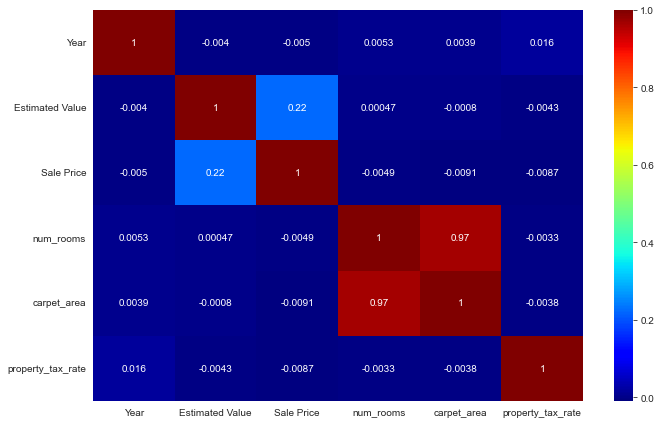

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(numeric_only=True),annot=True,cmap='jet')

In [31]:
train.drop('carpet_area',axis=1,inplace=True)

# Cardinality check

In [32]:
for col in train.select_dtypes(include='object'):
    print("{}------------{}\n".format(col,train[col].nunique()))

Locality------------170

Address------------441774

Property------------6

Residential------------5



In [33]:
train.drop("Address",axis=1,inplace=True)

<AxesSubplot: >

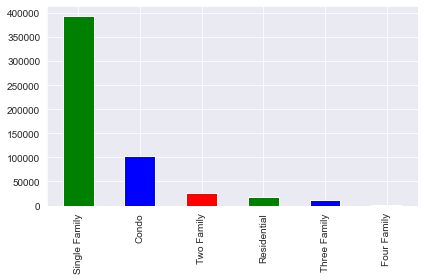

In [34]:
train.Property.value_counts().sort_values(ascending=False).plot(kind='bar',color=['green','blue','red'])

<AxesSubplot: >

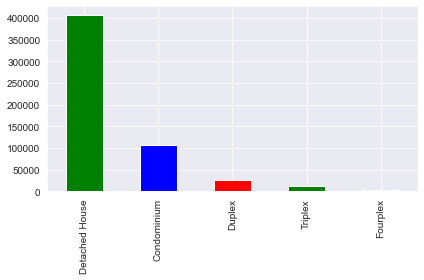

In [35]:
train.Residential.value_counts().sort_values(ascending=False).plot(kind='bar',color=['green','blue','red'])

In [37]:
train

,Year,Date,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,property_tax_rate
0,2009,2009-01-02,Greenwich,711270.0,975000.0,Condo,Condominium,2,1.025953
1,2009,2009-01-02,East Hampton,119970.0,189900.0,Single Family,Detached House,3,1.025953
2,2009,2009-01-02,Ridgefield,494530.0,825000.0,Single Family,Detached House,3,1.025953
3,2009,2009-01-02,Old Lyme,197600.0,450000.0,Single Family,Detached House,3,1.025953
4,2009,2009-01-02,Naugatuck,105440.0,200000.0,Single Family,Detached House,3,1.025953
...,...,...,...,...,...,...,...,...,...
553929,2022,2022-12-31,Enfield,122420.0,198000.0,Residential,Detached House,3,1.003979
553930,2022,2022-12-31,Naugatuck,139180.0,319900.0,Residential,Detached House,3,1.003979
553931,2022,2022-12-31,South Windsor,200000.0,305000.0,Residential,Detached House,3,1.003979
553932,2022,2022-12-31,Bloomfield,195440.0,271000.0,Residential,Detached House,3,1.003979


# Outlier analysis

<AxesSubplot: xlabel='Year', ylabel='count'>

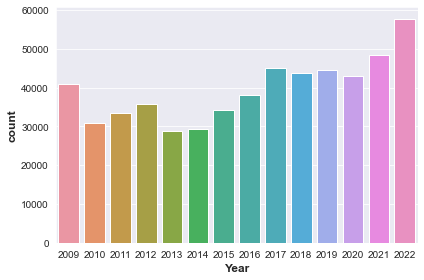

In [36]:
sns.countplot(train,x='Year')

In [32]:
math.floor(1/3)

0

In [24]:
import math

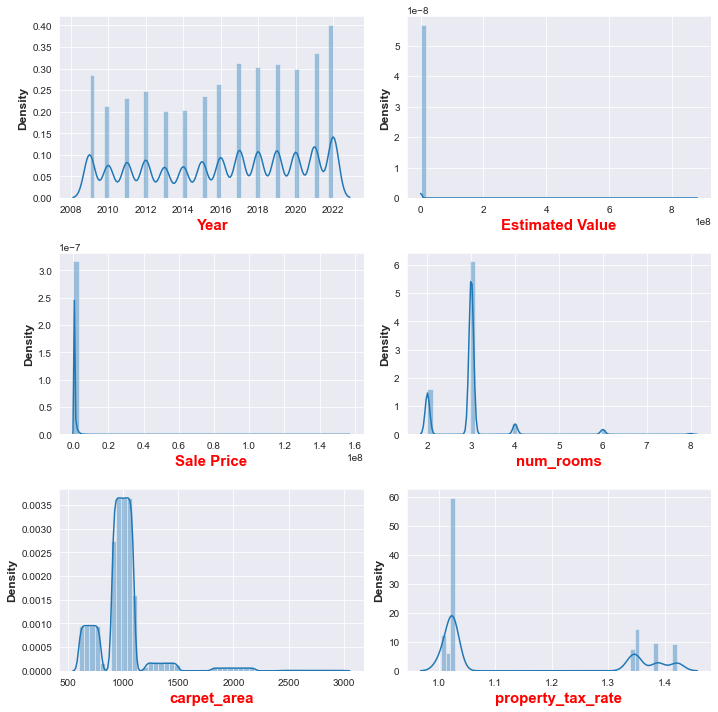

In [17]:
DFdistplot(train)

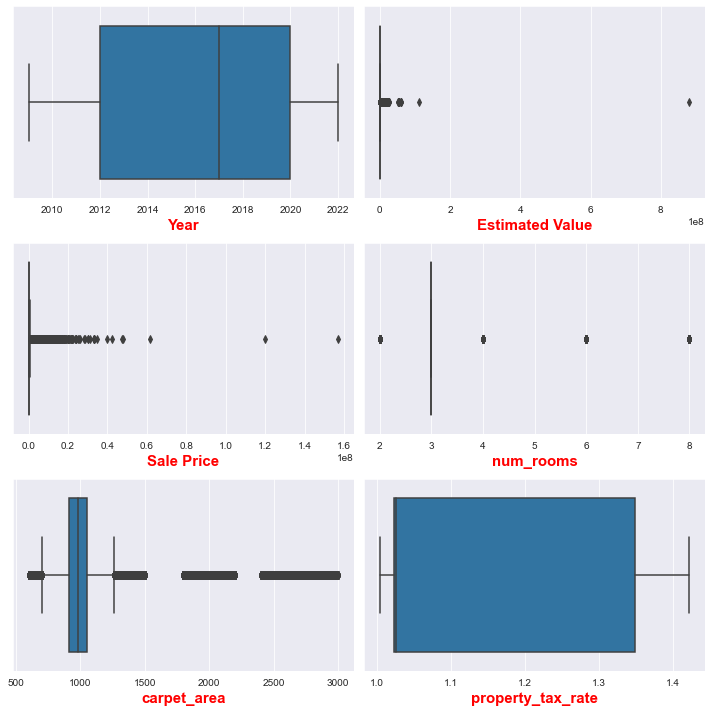

In [18]:
DFboxplot(train)

In [ ]:
1. check for null data
2. duplicates
2. outlier treatment

univariate analysis
bivariate analysis


feature engineering
        --categorical data handling
feature scaling
feature selection


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               553952 non-null  int64  
 1   Date               553952 non-null  object 
 2   Locality           553952 non-null  object 
 3   Address            553952 non-null  object 
 4   Estimated Value    553952 non-null  float64
 5   Sale Price         553952 non-null  float64
 6   Property           553952 non-null  object 
 7   Residential        553952 non-null  object 
 8   num_rooms          553952 non-null  int64  
 9   carpet_area        553952 non-null  int64  
 10  property_tax_rate  553952 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 46.5+ MB


In [6]:
train.isna().sum()

Year                 0
Date                 0
Locality             0
Address              0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
carpet_area          0
property_tax_rate    0
dtype: int64

In [9]:
train.duplicated().sum()

18

In [11]:
train[train.duplicated(keep=False)]

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
62928,2010,2010-09-17,Old Lyme,6 WHIPPLETREE LANE,514800.0,630000.0,Single Family,Detached House,3,1048,1.025846
62967,2010,2010-09-17,Old Lyme,6 WHIPPLETREE LANE,514800.0,630000.0,Single Family,Detached House,3,1048,1.025846
139809,2012,2012-12-20,Torrington,435 HILLANDALE BLVD,271480.0,290000.0,Single Family,Detached House,3,1004,1.021958
139835,2012,2012-12-20,Torrington,435 HILLANDALE BLVD,271480.0,290000.0,Single Family,Detached House,3,1004,1.021958
140784,2012,2012-12-30,New Britain,377 LEWIS RD,120050.0,24000.0,Single Family,Detached House,3,1057,1.021958
140871,2012,2012-12-30,New Britain,377 LEWIS RD,120050.0,24000.0,Single Family,Detached House,3,1057,1.021958
194475,2014,2014-11-05,Bridgeport,273-275 BROOKS ST,166930.0,68000.0,Three Family,Triplex,6,2003,1.350819
194482,2014,2014-11-05,Bridgeport,273-275 BROOKS ST,166930.0,68000.0,Three Family,Triplex,6,2003,1.350819
261815,2016,2016-10-10,New Britain,1894 STANLEY ST,135730.0,10000.0,Single Family,Detached House,3,1038,1.348259
261889,2016,2016-10-10,New Britain,1894 STANLEY ST,135730.0,10000.0,Single Family,Detached House,3,1038,1.348259


In [12]:
train.drop_duplicates(keep='last',ignore_index=True,inplace=True)

In [13]:
train['Date']=pd.to_datetime(train['Date'])

In [15]:
train.corr()*100

C:\Users\NITINS4.TTL\AppData\Local\Temp/ipykernel_7800/3325631982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()*100


,Year,Estimated Value,Sale Price,num_rooms,carpet_area,property_tax_rate
Year,100.000000,-0.403920,-0.500266,0.526343,0.391233,1.632795
Estimated Value,-0.403920,100.000000,22.093153,0.046898,-0.079518,-0.426462
Sale Price,-0.500266,22.093153,100.000000,-0.487544,-0.912074,-0.867285
num_rooms,0.526343,0.046898,-0.487544,100.000000,96.636051,-0.326340
carpet_area,0.391233,-0.079518,-0.912074,96.636051,100.000000,-0.381262
property_tax_rate,1.632795,-0.426462,-0.867285,-0.326340,-0.381262,100.000000
